In [1673]:
import pandas as pd
from sklearn.svm import OneClassSVM
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [1674]:
df=pd.read_csv('df.csv')

In [1675]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0,19.642432,19.700574,19.564909,19.681192,5247500,0.000180,7
1,1,19.719955,19.942834,19.632741,19.836239,5516600,0.000182,7
2,2,19.652122,19.768405,19.371099,19.400171,7587200,0.000180,7
3,3,19.177293,19.322649,19.070698,19.167603,6192500,0.000176,7
4,4,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7


In [1676]:
df.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'SHigh',
       'encoded_stock'],
      dtype='object')

In [1677]:
df.dtypes

Unnamed: 0         int64
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
SHigh            float64
encoded_stock      int64
dtype: object

In [1678]:
df=df.drop(columns='Unnamed: 0')

In [1679]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
SHigh            0
encoded_stock    0
dtype: int64

In [1680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3856 non-null   float64
 1   High           3856 non-null   float64
 2   Low            3856 non-null   float64
 3   Close          3856 non-null   float64
 4   Volume         3856 non-null   int64  
 5   SHigh          3856 non-null   float64
 6   encoded_stock  3856 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 211.0 KB


In [1681]:
df.describe()

,Open,High,Low,Close,Volume,SHigh,encoded_stock
count,3856.000000,3856.000000,3856.000000,3856.000000,3.856000e+03,3856.000000,3856.000000
mean,11443.061556,11634.448396,11253.825232,11449.193083,4.537834e+09,0.106625,6.433869
std,26434.644032,26879.390305,25990.552307,26448.482773,1.386343e+10,0.246340,4.073932
min,0.083592,0.085407,0.080831,0.083593,1.486950e+05,0.000000,0.000000
25%,108.853868,110.790934,105.765693,108.311890,9.229050e+06,0.001015,3.000000
50%,178.271940,180.825882,175.340004,178.127716,3.304650e+07,0.001656,6.000000
75%,536.201164,541.711203,527.488407,536.012115,9.490696e+08,0.004964,10.000000
max,106147.296875,109114.882812,105291.734375,106146.265625,1.492189e+11,1.000000,13.000000


In [1682]:
df.size

26992

In [1683]:
df.shape

(3856, 7)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'SHigh'}>],
       [<Axes: title={'center': 'encoded_stock'}>, <Axes: >, <Axes: >]],
      dtype=object)

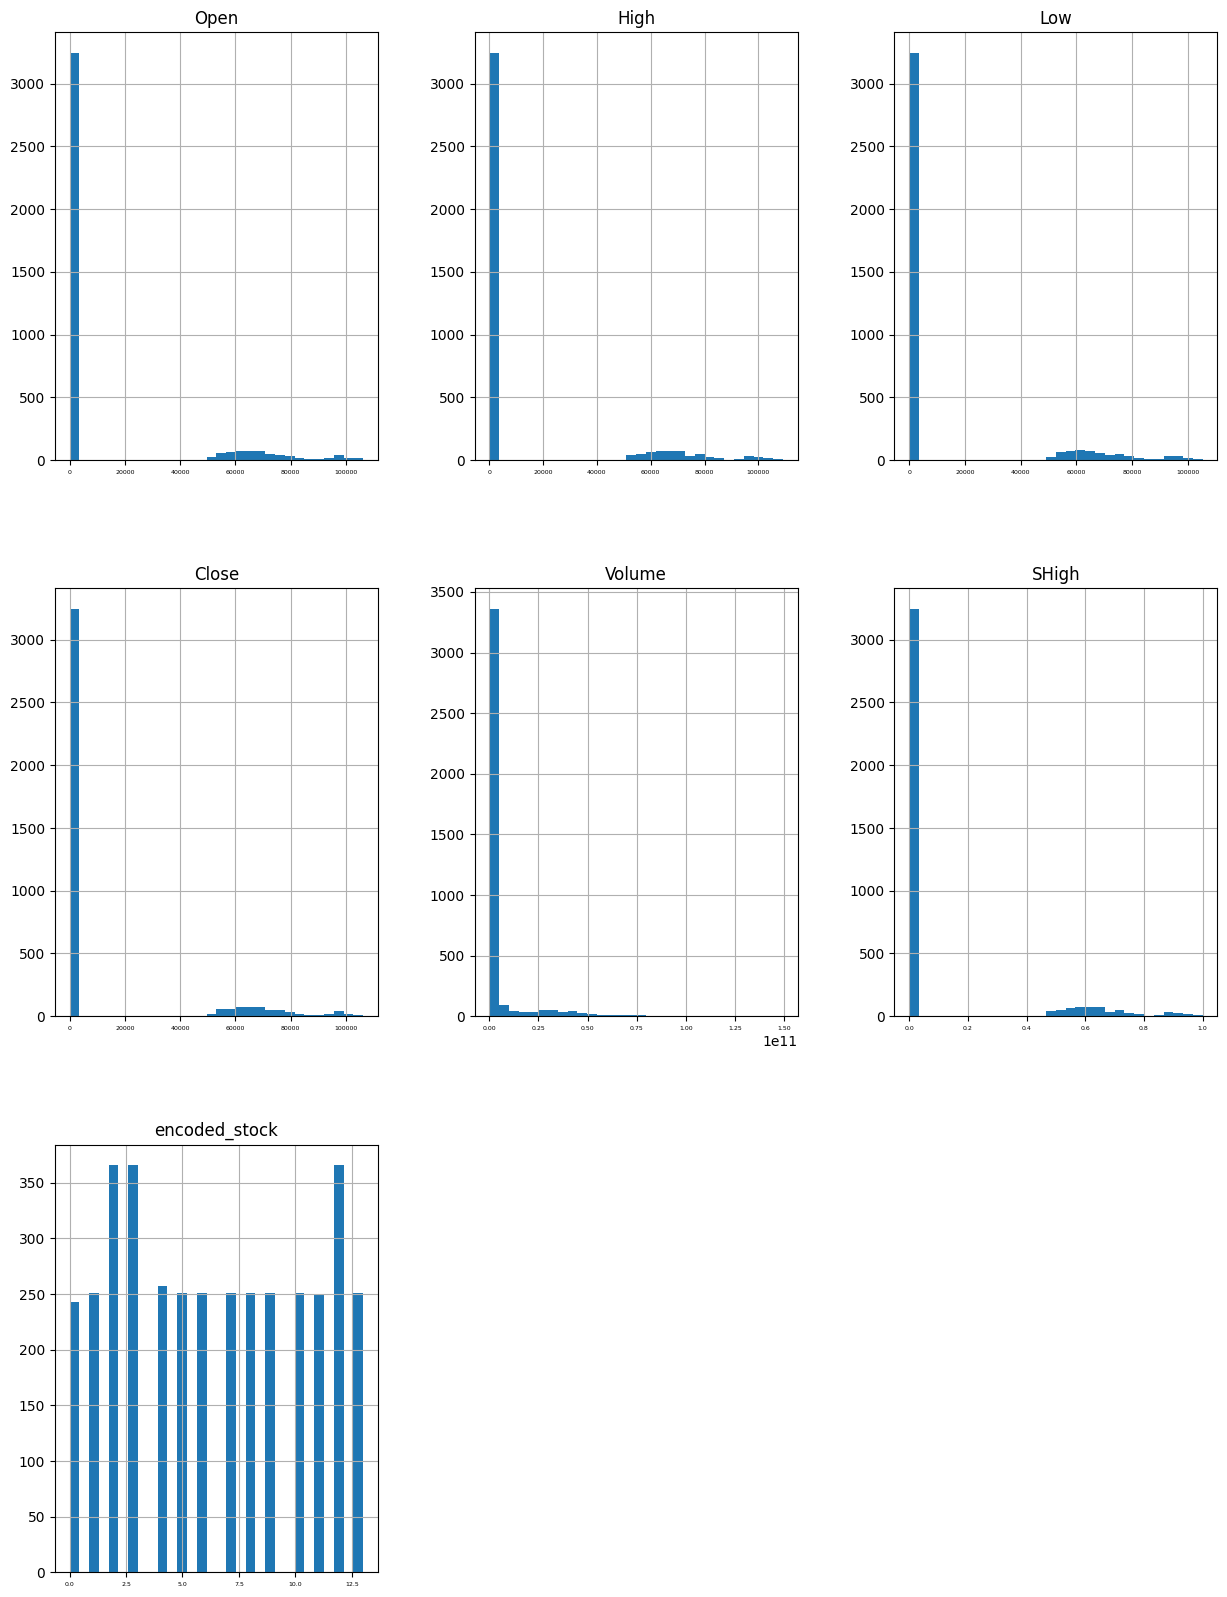

In [1684]:
import matplotlib.pyplot as plt
df.hist(column=df.columns,bins=30,figsize=(15,20),grid=True,xlabelsize=4.5)

In [1685]:
#transform
# pt=PowerTransformer(method="yeo-johnson")
# pt.set_output(transform="pandas")
# dft=pt.fit_transform(df)

In [1686]:
type(df)

pandas.core.frame.DataFrame

In [1687]:
from sklearn.pipeline import Pipeline

# pipe=Pipeline([ 
#    ( "transform",PowerTransformer(method="yeo-johnson")),
#      ("scaler",MinMaxScaler()),
#      ("mode",OneClassSVM(nu=1,kernel='rbf',gamma='scale'))])
# pipe.set_output(transform="pandas")
# scaled_data=pipe[:-1].fit_transform(df)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.svm import OneClassSVM
import numpy as np

pipe = Pipeline([
    ("log_transform", FunctionTransformer(np.log1p)),  # Log transformation
    ("scaler", MinMaxScaler()),
    ("model", OneClassSVM(nu=0.45, kernel='linear', gamma='scale'))
])
pipe.set_output(transform="pandas")
scaled_data = pipe[:-1].fit_transform(df)

# pipe = Pipeline([
#     ("transform", PowerTransformer(method="yeo-johnson")),
# ("scaler", MinMaxScaler())
# ])

# df_transformed = pipe.fit_transform(df)
# model = OneClassSVM(nu=0.01, kernel='linear', gamma=0.1)
# model.fit(df_transformed)  


In [1688]:
transformed_data = pipe[0].fit_transform(df)  # Output after PowerTransformer

print("Min values after PowerTransformer:\n", transformed_data.min(axis=0))
print("Max values after PowerTransformer:\n", transformed_data.max(axis=0))


Min values after PowerTransformer:
 Open              0.080281
High              0.081955
Low               0.077730
Close             0.080282
Volume           11.909659
SHigh             0.000000
encoded_stock     0.000000
dtype: float64
Max values after PowerTransformer:
 Open             11.572592
High             11.600166
Low              11.564500
Close            11.572583
Volume           25.728680
SHigh             0.693147
encoded_stock     2.639057
dtype: float64


In [1689]:
print(pipe)

Pipeline(steps=[('log_transform', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scaler', MinMaxScaler()),
                ('model', OneClassSVM(kernel='linear', nu=0.45))])


In [1690]:
pipe.set_output(transform="pandas")

Pipeline(steps=[('log_transform', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scaler', MinMaxScaler()),
                ('model', OneClassSVM(kernel='linear', nu=0.45))])

In [1691]:
from sklearn import set_config as st

In [1692]:
st(pipe)
display(pipe)

Pipeline(steps=[('log_transform', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scaler', MinMaxScaler()),
                ('model', OneClassSVM(kernel='linear', nu=0.45))])

In [1693]:
# dft
# pipe.fit_transform(df)

In [1694]:
# scaler = MinMaxScaler()
# # scaled_data = scaler.fit_transform(df)
# scaler.set_output(transform="pandas")
# scaled_data = scaler.fit_transform(dft)

In [1695]:
# scaled_data

In [1696]:
# scaled_data=pipe[:-1].transform("pandas")

In [1697]:
type(scaled_data)

pandas.core.frame.DataFrame

In [1698]:
#scaled_data=pd.DataFrame(scaled_data)
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3856 non-null   float64
 1   High           3856 non-null   float64
 2   Low            3856 non-null   float64
 3   Close          3856 non-null   float64
 4   Volume         3856 non-null   float64
 5   SHigh          3856 non-null   float64
 6   encoded_stock  3856 non-null   float64
dtypes: float64(7)
memory usage: 211.0 KB


In [1699]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.642432,19.700574,19.564909,19.681192,5247500,0.000180,7
1,19.719955,19.942834,19.632741,19.836239,5516600,0.000182,7
2,19.652122,19.768405,19.371099,19.400171,7587200,0.000180,7
3,19.177293,19.322649,19.070698,19.167603,6192500,0.000176,7
4,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
...,...,...,...,...,...,...,...
3851,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3852,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12
3853,196.773804,198.260757,189.427719,194.460953,2755407329,0.001816,12
3854,194.454559,205.125015,194.354050,199.935669,3732334277,0.001879,12


In [1700]:
sc=scaled_data.corr()

<Axes: >

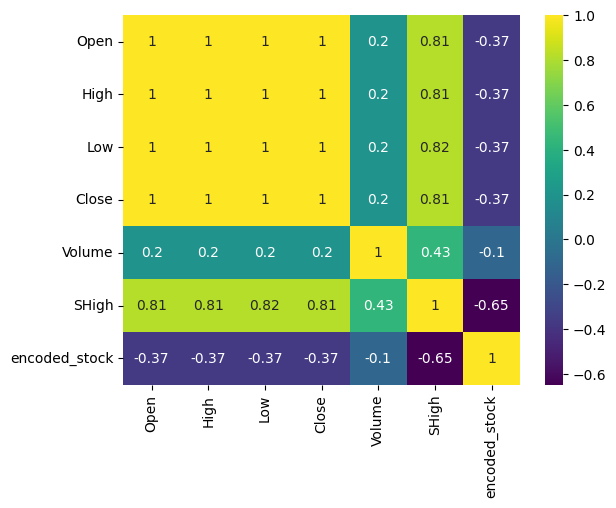

In [1701]:
sns.heatmap(data=sc, annot=True, cmap="viridis")

In [1702]:
scaled_data

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0.256438,0.255960,0.256456,0.256602,0.257877,0.000259,0.787949
1,0.256764,0.256971,0.256743,0.257251,0.261496,0.000263,0.787949
2,0.256479,0.256244,0.255632,0.255411,0.284558,0.000260,0.787949
3,0.254455,0.254361,0.254339,0.254413,0.269859,0.000254,0.787949
4,0.256152,0.256082,0.256251,0.256602,0.274364,0.000260,0.787949
...,...,...,...,...,...,...,...
3851,0.454635,0.455834,0.452871,0.453602,0.736415,0.002719,0.971919
3852,0.453603,0.452640,0.450300,0.453072,0.743185,0.002620,0.971919
3853,0.453072,0.452558,0.450217,0.452049,0.711134,0.002618,0.971919
3854,0.452045,0.455499,0.452441,0.454452,0.733094,0.002708,0.971919


In [1703]:
scaled_data.head()

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0.256438,0.255960,0.256456,0.256602,0.257877,0.000259,0.787949
1,0.256764,0.256971,0.256743,0.257251,0.261496,0.000263,0.787949
2,0.256479,0.256244,0.255632,0.255411,0.284558,0.000260,0.787949
3,0.254455,0.254361,0.254339,0.254413,0.269859,0.000254,0.787949
4,0.256152,0.256082,0.256251,0.256602,0.274364,0.000260,0.787949


In [1704]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.642432,19.700574,19.564909,19.681192,5247500,0.000180,7
1,19.719955,19.942834,19.632741,19.836239,5516600,0.000182,7
2,19.652122,19.768405,19.371099,19.400171,7587200,0.000180,7
3,19.177293,19.322649,19.070698,19.167603,6192500,0.000176,7
4,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
...,...,...,...,...,...,...,...
3851,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3852,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12
3853,196.773804,198.260757,189.427719,194.460953,2755407329,0.001816,12
3854,194.454559,205.125015,194.354050,199.935669,3732334277,0.001879,12


In [1705]:
# model=OneClassSVM(nu=0.01,kernel='linear',gamma=0.1)

In [1706]:
scaled_data.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
SHigh            0
encoded_stock    0
dtype: int64

In [1707]:
scaled_data.shape

(3856, 7)

In [1708]:
scaled_data.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
SHigh            float64
encoded_stock    float64
dtype: object

In [1709]:
import numpy as np

print("NaN values in dataset:\n",np.isnan(scaled_data).sum())
print("Infinite values in dataset:\n",np.isinf(scaled_data).sum())


NaN values in dataset:
 Open             0
High             0
Low              0
Close            0
Volume           0
SHigh            0
encoded_stock    0
dtype: int64
Infinite values in dataset:
 Open             0
High             0
Low              0
Close            0
Volume           0
SHigh            0
encoded_stock    0
dtype: int64


In [1710]:
import numpy as np
print("Max value:", np.max(scaled_data))
print("Min value:", np.min(scaled_data))
print("Contains Inf:",np.any(np.isinf(scaled_data)))
print("Contains NaN:",np.any(np.isnan(scaled_data)))


Max value: 1.0
Min value: 0.0
Contains Inf: False
Contains NaN: False


In [1711]:
pipe[-1].fit(scaled_data)  # Converts to NumPy array


OneClassSVM(kernel='linear', nu=0.45)

In [1712]:
print(pipe[-1].fit(scaled_data))

OneClassSVM(kernel='linear', nu=0.45)


In [1713]:
predictions=pipe[-1].predict(scaled_data)

In [1714]:
type(predictions)

numpy.ndarray

In [1715]:
predictions=pd.DataFrame(predictions)

In [1716]:
predictions

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
3851,1
3852,1
3853,1
3854,1


In [1717]:
np.count_nonzero(predictions == -1)

1735

In [1718]:
da=df.copy()

In [1719]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.642432,19.700574,19.564909,19.681192,5247500,0.000180,7
1,19.719955,19.942834,19.632741,19.836239,5516600,0.000182,7
2,19.652122,19.768405,19.371099,19.400171,7587200,0.000180,7
3,19.177293,19.322649,19.070698,19.167603,6192500,0.000176,7
4,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
...,...,...,...,...,...,...,...
3851,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3852,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12
3853,196.773804,198.260757,189.427719,194.460953,2755407329,0.001816,12
3854,194.454559,205.125015,194.354050,199.935669,3732334277,0.001879,12


In [1720]:
da['Anomalies']=predictions

In [1721]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.642432,19.700574,19.564909,19.681192,5247500,0.000180,7
1,19.719955,19.942834,19.632741,19.836239,5516600,0.000182,7
2,19.652122,19.768405,19.371099,19.400171,7587200,0.000180,7
3,19.177293,19.322649,19.070698,19.167603,6192500,0.000176,7
4,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
...,...,...,...,...,...,...,...
3851,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3852,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12
3853,196.773804,198.260757,189.427719,194.460953,2755407329,0.001816,12
3854,194.454559,205.125015,194.354050,199.935669,3732334277,0.001879,12


In [1722]:
da[da['Anomalies']==-1]


,Open,High,Low,Close,Volume,SHigh,encoded_stock,Anomalies
0,19.642432,19.700574,19.564909,19.681192,5247500,0.000180,7,-1
1,19.719955,19.942834,19.632741,19.836239,5516600,0.000182,7,-1
2,19.652122,19.768405,19.371099,19.400171,7587200,0.000180,7,-1
3,19.177293,19.322649,19.070698,19.167603,6192500,0.000176,7,-1
4,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7,-1
...,...,...,...,...,...,...,...,...
3234,51.180000,51.639999,51.180000,51.560001,188369,0.000472,4,-1
3235,51.439999,51.480000,50.220001,50.700001,243842,0.000471,4,-1
3236,50.660000,51.360001,50.340000,50.480000,331591,0.000470,4,-1
3237,50.759998,51.160000,50.200001,50.500000,356991,0.000468,4,-1


In [1723]:
len(da[da['Anomalies']==-1])

1735

In [1724]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.642432,19.700574,19.564909,19.681192,5247500,0.000180,7
1,19.719955,19.942834,19.632741,19.836239,5516600,0.000182,7
2,19.652122,19.768405,19.371099,19.400171,7587200,0.000180,7
3,19.177293,19.322649,19.070698,19.167603,6192500,0.000176,7
4,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
...,...,...,...,...,...,...,...
3851,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3852,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12
3853,196.773804,198.260757,189.427719,194.460953,2755407329,0.001816,12
3854,194.454559,205.125015,194.354050,199.935669,3732334277,0.001879,12


In [1725]:
predictions.shape

(3856, 1)

In [1726]:
da['Anomalies']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
3851    1
3852    1
3853    1
3854    1
3855    1
Name: Anomalies, Length: 3856, dtype: int64

Text(0.5, 0, 'High')

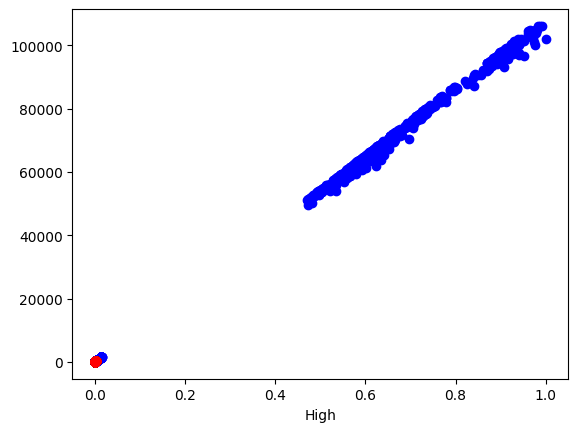

In [1727]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
# ----> 2 plt.scatter(da.loc[da['Anomalies']==1, 'SHigh'], da.loc[da['Anomalies']== 1, 'Close'], label='Normal', color='blue')
#       3 plt.scatter(da.loc[da['Anomalies']==-1, 'SHigh'], da.loc[da['Anomalies']== -1, 'Close'], label='Anomalies', color='red')
plt.scatter(da.loc[da['Anomalies']==1,'SHigh'], da.loc[da['Anomalies']==1, 'Close'], label='Normal', color='blue')
plt.scatter(da.loc[da['Anomalies']==-1, 'SHigh'], da.loc[da['Anomalies']==-1, 'Close'], label='Anomalies', color='red')
plt.xlabel('High')

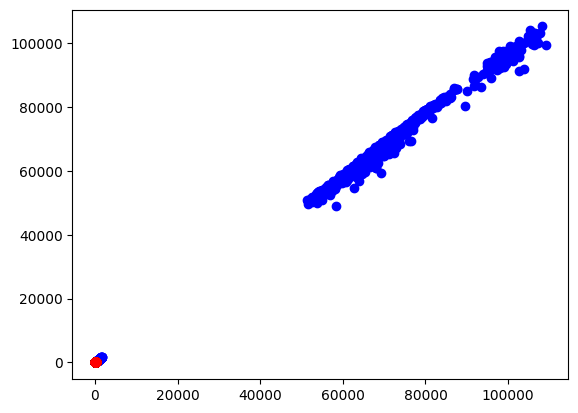

In [1728]:
plt.scatter(da.loc[da['Anomalies']==1,'High'], da.loc[da['Anomalies']==1, 'Low'], label='Normal', color='blue')
plt.scatter(da.loc[da['Anomalies']==-1, 'High'], da.loc[da['Anomalies']==-1, 'Low'], label='Anomalies', color='red')
# plt.scatter(da.loc[da['Anomalies']==1,'High'],da.loc[da['Anomalies']==1,'Low'],label='Normal',color='blue')
# plt.scatter(da.loc[da['Anomalies'] == -1, 'High'], da.loc[da['Anomalies'] == -1, 'Low'], label='Anomalies', color='red')

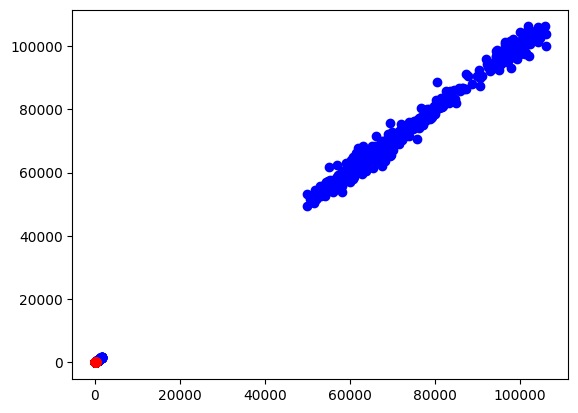

In [1729]:
plt.scatter(da.loc[da['Anomalies']==1, 'Open'], da.loc[da['Anomalies']== 1, 'Close'], label='Normal', color='blue')
plt.scatter(da.loc[da['Anomalies']==-1, 'Open'], da.loc[da['Anomalies']==-1, 'Close'], label='Anomalies', color='red')

In [1730]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SHigh', 'encoded_stock'], dtype='object')

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
num_points = 50
num_anomalies = 15

test_data = pd.DataFrame({
    'Open': np.random.uniform(150, 700, num_points),
    'High': np.random.uniform(151, 710, num_points),
    'Low': np.random.uniform(149, 690, num_points),
    'Close': np.random.uniform(150, 705, num_points),
    'Volume': np.random.randint(1_000_000, 100_000_000, num_points),
    'SHigh': np.random.uniform(0.001, 0.01, num_points),
    'encoded_stock': np.random.randint(1, 15, num_points)
})
anomaly_indices = np.random.choice(num_points, num_anomalies, replace=False)

for i in anomaly_indices:
    anomaly_type = np.random.choice(['price_spike', 'price_crash', 'volume_surge', 'volume_drop'])

    if anomaly_type == 'price_spike':
        test_data.loc[i, ['Open', 'High', 'Low', 'Close']] *= np.random.uniform(2, 5) 
    elif anomaly_type == 'price_crash':
        test_data.loc[i, ['Open', 'High', 'Low', 'Close']] *= np.random.uniform(0.2, 0.5)
    elif anomaly_type == 'volume_surge':
        test_data.loc[i, 'Volume'] *= np.random.uniform(5, 10) 
    elif anomaly_type == 'volume_drop':
        test_data.loc[i, 'Volume'] *= np.random.uniform(0.1, 0.3)   
    if anomaly_type in ['price_spike','price_crash']:
        test_data.loc[i, 'SHigh'] *= np.random.uniform(2, 5)

print(test_data.head())
print("\nAnomaly indices:", anomaly_indices)

# # You can save this to a CSV file if needed:
# # test_data.to_csv("stock_data_with_anomalies.csv", index=False)
# import pandas as pd

# data = {
#     "Open": [523.54, 312.67, 670.45, 421.38, 598.27, 700.19, 283.46, 401.57, 150.23, 482.90,
#              373.14, 651.47, 189.72, 467.53, 510.86, 320.94, 649.21, 305.32, 575.48, 258.14,
#              609.78, 487.65, 389.32, 276.49, 568.90, 432.79, 621.58, 211.43, 375.96, 493.87],
    
#     "High": [540.12, 328.91, 685.74, 437.85, 612.43, 715.32, 294.68, 415.29, 160.84, 498.21,
#              388.27, 667.42, 200.16, 482.98, 528.41, 337.06, 666.84, 320.49, 590.76, 270.38,
#              626.52, 503.78, 405.21, 287.64, 582.43, 447.65, 639.21, 224.57, 389.41, 508.12],

#     "Low": [512.98, 300.45, 659.78, 410.67, 587.12, 690.38, 273.85, 390.42, 140.95, 470.58,
#             360.32, 640.85, 179.46, 455.69, 498.27, 307.38, 633.29, 290.41, 560.78, 245.96,
#             590.34, 468.39, 370.48, 260.75, 550.98, 417.84, 603.15, 200.89, 360.78, 480.64],

#     "Close": [532.67, 318.75, 674.32, 428.49, 605.21, 708.96, 288.35, 408.72, 155.32, 490.76,
#               376.48, 654.23, 192.63, 472.58, 515.67, 326.84, 655.48, 315.37, 580.23, 263.74,
#               618.93, 495.76, 393.74, 280.34, 575.23, 438.27, 629.85, 217.65, 380.21, 500.35],

#     "Volume": [56023894, 38472059, 75839421, 47283940, 68903475, 90348293, 29038475, 45789234,
#                15038294, 51283947, 38947283, 73928501, 20037485, 46928574, 53048572, 34589230,
#                68934587, 31048293, 57892384, 24857392, 63485729, 48573920, 39857234, 26749385,
#                57923847, 42038572, 64573829, 21758394, 37948295, 49857203],

#     "SHigh": [0.0085, 0.0072, 0.0091, 0.0067, 0.0089, 0.0098, 0.0063, 0.0078, 0.0052, 0.0084,
#               0.0075, 0.0093, 0.0058, 0.0080, 0.0087, 0.0071, 0.0090, 0.0066, 0.0083, 0.0057,
#               0.0086, 0.0077, 0.0070, 0.0060, 0.0082, 0.0073, 0.0092, 0.0059, 0.0074, 0.0081],

#     "encoded_stock": [12, 5, 8, 3, 9, 14, 2, 6, 1, 7, 4, 10, 2, 9, 11, 5, 13, 3, 8, 1, 
#                       10, 7, 4, 6, 12, 5, 9, 3, 11, 14]
# }

# test_data = pd.DataFrame(data)
print(test_data)


         Open        High         Low  ...        Volume     SHigh  encoded_stock
0  355.997065  692.997807  166.003189  ...  7.415036e+07  0.003072              6
1  672.892869  584.299248  493.298032  ...  2.866321e+08  0.005493              3
2  552.596668  676.179908  319.066586  ...  9.394292e+07  0.006148              9
3  479.262166  651.208489  424.136744  ...  2.410138e+07  0.007917             10
4  235.810252  485.226088  639.993462  ...  1.856919e+07  0.001392             14

[5 rows x 7 columns]

Anomaly indices: [27  7 48 34 35  1 17 12  5 10  9 23 20 49 40]
           Open         High  ...     SHigh  encoded_stock
0    355.997065   692.997807  ...  0.003072              6
1    672.892869   584.299248  ...  0.005493              3
2    552.596668   676.179908  ...  0.006148              9
3    479.262166   651.208489  ...  0.007917             10
4    235.810252   485.226088  ...  0.001392             14
5    857.558356  2423.334131  ...  0.048007             13
6    181

C:\Users\arifu\AppData\Local\Temp\ipykernel_5824\77404699.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '184195083.72589582' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  test_data.loc[i, 'Volume'] *= np.random.uniform(5, 10)  # Larger volume surge


In [1732]:
from sklearn.preprocessing import MinMaxScaler
test_data=pipe[:-1].fit_transform(test_data)
# scaler=MinMaxScaler()
# scaled_data=scaler.fit_transform(test_data)
predictions=pipe[-1].predict(test_data)



In [1733]:
# test_data['Anomalies']=predictions
test_data['Anomalies']=pd.DataFrame(predictions)

In [1734]:
test_data.shape

(50, 8)

In [1735]:
len(test_data[test_data['Anomalies']==-1].value_counts())

16

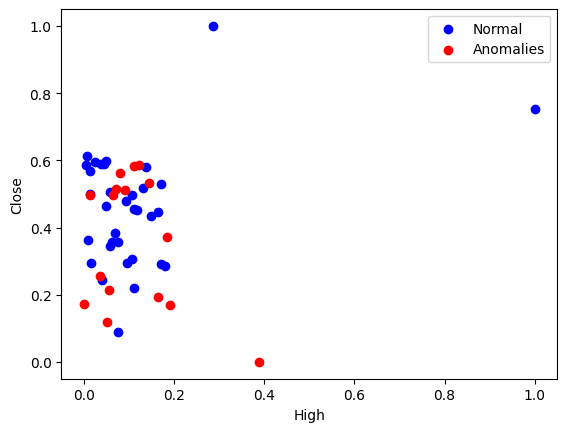

In [1736]:
import matplotlib.pyplot as plt

plt.scatter(test_data.loc[test_data['Anomalies']== 1,'SHigh'],test_data.loc[test_data['Anomalies']== 1, 'Close'], label='Normal', color='blue')
plt.scatter(test_data.loc[test_data['Anomalies']==-1,'SHigh'],test_data.loc[test_data['Anomalies']==-1,'Close'], label='Anomalies', color='red')
plt.xlabel('High')
plt.ylabel('Close')
plt.legend()
plt.show()



Actual anomalies: 15
Predicted anomalies: 16
Total data points: 50

1 falsepositive
TP=15
Accuracy=(TP + TN) /Total Points

Since we don't have explicit TN, let's calculate Precision & Recall:
Precision (Positive Predictive Value):
Precision = TP/(TP + FP) = 15 / (15 + 1) = 15/16= 0.9375 (93.75%)



